In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -r /content/drive/MyDrive/NNTI_Project_files/Project_Files/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install wandb

In [4]:
import torch
from datasets import load_dataset
import torch.nn as nn
from transformers import AutoModel, AutoTokenizer, AutoModelForMaskedLM, DataCollatorForLanguageModeling
from torch.utils.data import DataLoader, Dataset, Subset
from sklearn.model_selection import train_test_split
import pandas as pd
from tqdm.notebook import tqdm
import random
import wandb

In [5]:
wandb.init(project="NNTI_Project_v2")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: solankishaique (solankishaique-max-planck-institute-for-informatics) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForMaskedLM
from tqdm import tqdm
import wandb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
wandb.init(project="NNTI_Project_Task2")

In [8]:
# Specify the dataset name and model name
DATASET_PATH = "scikit-fingerprints/MoleculeNet_Lipophilicity"
MODEL_NAME = "ibm/MoLFormer-XL-both-10pct"  # MoLFormer model

# Load the dataset from HuggingFace
dataset = load_dataset(DATASET_PATH)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.16k [00:00<?, ?B/s]

lipophilicity.csv:   0%|          | 0.00/223k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/4200 [00:00<?, ? examples/s]

In [9]:
# Explore the dataset
# For example, print the column names and display a few sample rows
# TODO: your code goes here
print(dataset['train'].column_names)
print(dataset['train'].to_pandas().head())

['SMILES', 'label']
                                              SMILES  label
0            Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14   3.54
1  COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...  -1.18
2             COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl   3.69
3  OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...   3.37
4  Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...   3.10


In [10]:
# define a PyTorch Dataset class for handling SMILES strings and targets

# TODO: your code goes here
class SMILESDataset(Dataset):
    def __init__(self, dataset, tokenizer, max_length=128):
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.data = self.prepare_data()

    def prepare_data(self):
        processed_data = []

        for data_point in tqdm(self.dataset):
            encoded_input = self.tokenizer(
                data_point["SMILES"],
                padding="max_length",
                truncation=True,
                max_length=self.max_length,
                return_tensors="pt"
            )
            target_tensor = torch.tensor(data_point["label"], dtype=torch.float)
            processed_data.append({
                "input_ids": encoded_input["input_ids"].squeeze(0),
                "attention_mask": encoded_input["attention_mask"].squeeze(0),
                "target": target_tensor
            })
        return processed_data

    def get_data(self):
        return self.data

In [11]:
# tokenize the data
# load a pre-trained tokenizer from HuggingFace
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, trust_remote_code=True)

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenization_molformer_fast.py:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

tokenization_molformer.py:   0%|          | 0.00/9.48k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ibm/MoLFormer-XL-both-10pct:
- tokenization_molformer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/ibm/MoLFormer-XL-both-10pct:
- tokenization_molformer_fast.py
- tokenization_molformer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


vocab.json:   0%|          | 0.00/41.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/54.0k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [12]:
# split the data into training and test datasets
# TODO: your code goes here
train_test_split = dataset["train"].train_test_split(test_size=0.2, seed=42)
train_dataset = train_test_split["train"]
test_dataset = train_test_split["test"]

In [13]:
# construct Pytorch data loaders for both train and test datasets
BATCH_SIZE = 16 # adjust based on memory constraints

# TODO: your code goes here
train_dataset = SMILESDataset(train_dataset, tokenizer)
test_dataset = SMILESDataset(test_dataset, tokenizer)
train_data = train_dataset.get_data()
test_data = test_dataset.get_data()

# creating dataloaders
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

100%|██████████| 840/840 [00:00<00:00, 1886.64it/s]


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
saved_model_path = "/content/drive/MyDrive/NNTI_Project_files/Project_Files/model_saves/task_1_v2/task_1_FT_model_wo_reg.pth"

In [15]:
# Define the regression model architecture (same as in Task 1)
class MoLFormerWithRegressionHead(nn.Module):
    def __init__(self, base_model, hidden_dim=2362):
        super(MoLFormerWithRegressionHead, self).__init__()
        self.base_model = base_model
        self.regression_head = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, 1)  # Output single regression value (lipophilicity)
        )

    def forward(self, input_ids, attention_mask=None):
        outputs = self.base_model(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs[0]  # outputs[0] is the last hidden state tensor
        pooled_output = last_hidden_state[:, 0, :]  # use [CLS] token representation
        return self.regression_head(pooled_output)

In [ ]:
base_model = AutoModelForMaskedLM.from_pretrained(MODEL_NAME, trust_remote_code=True).to(device)
regression_model = MoLFormerWithRegressionHead(base_model, hidden_dim=2362).to(device)
checkpoint = torch.load(saved_model_path, map_location=device)
regression_model.load_state_dict(checkpoint['state_dict'], strict=False)


config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

configuration_molformer.py:   0%|          | 0.00/7.60k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ibm/MoLFormer-XL-both-10pct:
- configuration_molformer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_molformer.py:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ibm/MoLFormer-XL-both-10pct:
- modeling_molformer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/187M [00:00<?, ?B/s]

<ipython-input-16-675af4222dea>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(saved_model_path, map_location=device)


_IncompatibleKeys(missing_keys=['base_model.molformer.embeddings.word_embeddings.weight', 'base_model.molformer.encoder.layer.0.attention.self.query.weight', 'base_model.molformer.encoder.layer.0.attention.self.query.bias', 'base_model.molformer.encoder.layer.0.attention.self.key.weight', 'base_model.molformer.encoder.layer.0.attention.self.key.bias', 'base_model.molformer.encoder.layer.0.attention.self.value.weight', 'base_model.molformer.encoder.layer.0.attention.self.value.bias', 'base_model.molformer.encoder.layer.0.attention.self.feature_map.weight', 'base_model.molformer.encoder.layer.0.attention.output.dense.weight', 'base_model.molformer.encoder.layer.0.attention.output.dense.bias', 'base_model.molformer.encoder.layer.0.attention.output.LayerNorm.weight', 'base_model.molformer.encoder.layer.0.attention.output.LayerNorm.bias', 'base_model.molformer.encoder.layer.0.intermediate.dense.weight', 'base_model.molformer.encoder.layer.0.intermediate.dense.bias', 'base_model.molformer.en

##Loading External Dataset

In [17]:
external_df = pd.read_csv("/content/drive/MyDrive/NNTI_Project_files/Project_Files/tasks/External-Dataset_for_Task2.csv")

In [18]:
class ExternalSMILESDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=128):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        smiles = row["SMILES"]
        label = row["Label"]  # "Labels" in external data
        encoded = self.tokenizer(smiles, padding="max_length", truncation=True,
                                 max_length=self.max_length, return_tensors="pt")
        item = {
            "input_ids": encoded["input_ids"].squeeze(0),
            "attention_mask": encoded["attention_mask"].squeeze(0),
            "target": torch.tensor(label, dtype=torch.float)
        }
        return item

In [ ]:
external_dataset = ExternalSMILESDataset(external_df, tokenizer)
external_loader = DataLoader(external_dataset, batch_size=1, shuffle=False)


##Influence Score Computation via LiSSA

In [ ]:
def compute_gradients(model, loss_fn, batch):
    model.zero_grad()
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    target = batch["target"].to(device).unsqueeze(1)
    output = model(input_ids, attention_mask)
    loss = loss_fn(output, target)
    loss.backward()
    grad_list = []
    for param in model.parameters():
        if param.grad is not None:
            grad_list.append(param.grad.view(-1))
    grad_vector = torch.cat(grad_list)
    return grad_vector

# simplified lissa approximation for inverse hessian vector product (iHVP)
def lissa_inverse_hvp(model, loss_fn, v, train_loader, damping=0.01, scale=25.0, recursion_depth=100):
    inverse_hvp = v.clone().to(device)
    train_iter = iter(train_loader)
    for i in range(recursion_depth):
        try:
            batch = next(train_iter)
        except StopIteration:
            train_iter = iter(train_loader)
            batch = next(train_iter)
        model.zero_grad()
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        target = batch["target"].to(device).unsqueeze(1)
        output = model(input_ids, attention_mask)
        loss = loss_fn(output, target)
        grad_params = torch.autograd.grad(loss, model.parameters(), create_graph=True)
        grad_vector = torch.cat([g.view(-1) for g in grad_params])
        # Hessian-vector product: compute derivative of grad_vector * inverse_hvp
        hvp = torch.autograd.grad(grad_vector, model.parameters(), grad_outputs=inverse_hvp, retain_graph=True)
        hvp = torch.cat([g.contiguous().view(-1) for g in hvp])
        inverse_hvp = v + (1 - damping) * inverse_hvp - scale * hvp
    return inverse_hvp

In [ ]:
test_batch = next(iter(test_loader))
v = compute_gradients(regression_model, nn.MSELoss(), test_batch)

In [ ]:
influence_scores = []
external_sample_indices = []

In [ ]:
for idx, batch in enumerate(tqdm(external_loader, desc="Computing influence scores")):
    grad_external = compute_gradients(regression_model, nn.MSELoss(), batch)
    iHVP = lissa_inverse_hvp(regression_model, nn.MSELoss(), grad_external, train_loader)
    # Influence score: negative dot product of test gradient (v) and iHVP
    influence = - torch.dot(v, iHVP).item()
    influence_scores.append(influence)
    external_sample_indices.append(idx)

Computing influence scores: 100%|██████████| 300/300 [1:29:06<00:00, 17.82s/it]


In [24]:
torch.save({"indices": external_sample_indices, "scores": influence_scores},
           "/content/drive/MyDrive/influence_scores_with_indices.pth")

In [29]:
print(len(influence_scores))
print(len(external_sample_indices))

300
300


In [ ]:
#influence_data = torch.load("/content/drive/MyDrive/influence_scores_with_indices.pth")

#influence_scores = influence_data["scores"]
#external_sample_indices = influence_data["indices"]

#print("Influence scores and indices loaded successfully.")

##Select High-impact External sampples

In [38]:
k = 50
influence_scores_np = np.array(influence_scores)
topk_indices = np.argsort(influence_scores_np)[-k:]

In [ ]:
selected_external_data = []
for idx in topk_indices:
    selected_external_data.append(external_dataset[idx])

##Combine with original dataset

In [ ]:
combined_train_data = train_dataset.get_data() + selected_external_data

combined_train_loader = DataLoader(combined_train_data, batch_size=16, shuffle=True)

In [41]:
# Fine-tune the regression model on the combined training data
finetune_optimizer = optim.AdamW(regression_model.parameters(), lr=2e-5)
finetune_epochs = 10

In [42]:
wandb.init(project="NNTI_Project_v2", name="Regression_FT_with_Selected_Data", reinit=True)

for epoch in range(finetune_epochs):
    regression_model.train()
    total_loss = 0
    for batch in tqdm(combined_train_loader, desc=f"Fine-tuning epoch {epoch+1}"):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        targets = batch["target"].to(device).unsqueeze(1)
        finetune_optimizer.zero_grad()
        outputs = regression_model(input_ids, attention_mask)
        loss = nn.MSELoss()(outputs, targets)
        loss.backward()
        finetune_optimizer.step()
        total_loss += loss.item()
    print(f"Finetune Epoch {epoch+1}: Loss = {total_loss/len(combined_train_loader)}")
    wandb.log({"finetune_epoch_loss": total_loss/len(combined_train_loader)})

final_test_mae,▁
final_test_mse,▁
final_test_r2,▁
final_test_rmse,▁
finetune_epoch_loss,█▇▆▆▆▅▅▄▄▃▃▃▃▂▂▂▂▁▁▁
final_test_mae,0.4664
final_test_mse,0.40068
final_test_r2,0.71542
final_test_rmse,0.63299
finetune_epoch_loss,0.07139


Fine-tuning epoch 1: 100%|██████████| 214/214 [00:14<00:00, 15.25it/s]


Finetune Epoch 1: Loss = 0.0776771129866209


Fine-tuning epoch 2: 100%|██████████| 214/214 [00:14<00:00, 15.26it/s]


Finetune Epoch 2: Loss = 0.08078661688089928


Fine-tuning epoch 3: 100%|██████████| 214/214 [00:14<00:00, 15.21it/s]


Finetune Epoch 3: Loss = 0.08076024807502176


Fine-tuning epoch 4: 100%|██████████| 214/214 [00:13<00:00, 15.34it/s]


Finetune Epoch 4: Loss = 0.07306517604912553


Fine-tuning epoch 5: 100%|██████████| 214/214 [00:13<00:00, 15.41it/s]


Finetune Epoch 5: Loss = 0.06325173489401274


Fine-tuning epoch 6: 100%|██████████| 214/214 [00:13<00:00, 15.42it/s]


Finetune Epoch 6: Loss = 0.06598199284243807


Fine-tuning epoch 7: 100%|██████████| 214/214 [00:13<00:00, 15.43it/s]


Finetune Epoch 7: Loss = 0.060048135950569514


Fine-tuning epoch 8: 100%|██████████| 214/214 [00:13<00:00, 15.32it/s]


Finetune Epoch 8: Loss = 0.0595537151044635


Fine-tuning epoch 9: 100%|██████████| 214/214 [00:13<00:00, 15.43it/s]


Finetune Epoch 9: Loss = 0.06109799117406952


Fine-tuning epoch 10: 100%|██████████| 214/214 [00:13<00:00, 15.38it/s]

Finetune Epoch 10: Loss = 0.05938276859156996


##Evaluate the final model on test set

In [43]:
regression_model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        targets = batch["target"].to(device)
        outputs = regression_model(input_ids, attention_mask).squeeze(1)
        predictions.extend(outputs.cpu().numpy())
        actuals.extend(targets.cpu().numpy())

mse_final = mean_squared_error(actuals, predictions)
rmse_final = np.sqrt(mse_final)
mae_final = mean_absolute_error(actuals, predictions)
r2_final = r2_score(actuals, predictions)

print("Final Model Performance on Test Set:")
print("MSE:", mse_final)
print("RMSE:", rmse_final)
print("MAE:", mae_final)
print("R2:", r2_final)
wandb.log({"final_test_mse": mse_final, "final_test_rmse": rmse_final,
           "final_test_mae": mae_final, "final_test_r2": r2_final})

Final Model Performance on Test Set:
MSE: 0.3711349097637513
RMSE: 0.6092084288351166
MAE: 0.4535766556393355
R2: 0.7364062156741611


In [36]:
wandb.init(project="NNTI_Project_v2", name="Regression_FT_with_Selected_Data_run2", reinit=True)
epochs = 20
for epoch in range(epochs):
    regression_model.train()
    total_loss = 0
    for batch in tqdm(combined_train_loader, desc=f"Fine-tuning epoch {epoch+1}"):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        targets = batch["target"].to(device).unsqueeze(1)
        finetune_optimizer.zero_grad()
        outputs = regression_model(input_ids, attention_mask)
        loss = nn.MSELoss()(outputs, targets)
        loss.backward()
        finetune_optimizer.step()
        total_loss += loss.item()
    print(f"Finetune Epoch {epoch+1}: Loss = {total_loss/len(combined_train_loader)}")
    wandb.log({"finetune_epoch_loss": total_loss/len(combined_train_loader)})

final_test_mae,▁
final_test_mse,▁
final_test_r2,▁
final_test_rmse,▁
finetune_epoch_loss,█▄▃▂▂▂▁▁▁▁
final_test_mae,0.49129
final_test_mse,0.42844
final_test_r2,0.69571
final_test_rmse,0.65455
finetune_epoch_loss,0.20239


Fine-tuning epoch 1: 100%|██████████| 217/217 [00:14<00:00, 15.30it/s]


Finetune Epoch 1: Loss = 0.17599222472598475


Fine-tuning epoch 2: 100%|██████████| 217/217 [00:14<00:00, 15.45it/s]


Finetune Epoch 2: Loss = 0.16730938947969867


Fine-tuning epoch 3: 100%|██████████| 217/217 [00:14<00:00, 15.49it/s]


Finetune Epoch 3: Loss = 0.14382387447055034


Fine-tuning epoch 4: 100%|██████████| 217/217 [00:13<00:00, 15.50it/s]


Finetune Epoch 4: Loss = 0.14602514744354284


Fine-tuning epoch 5: 100%|██████████| 217/217 [00:14<00:00, 15.48it/s]


Finetune Epoch 5: Loss = 0.14006155047754537


Fine-tuning epoch 6: 100%|██████████| 217/217 [00:14<00:00, 15.46it/s]


Finetune Epoch 6: Loss = 0.12562244891914354


Fine-tuning epoch 7: 100%|██████████| 217/217 [00:13<00:00, 15.51it/s]


Finetune Epoch 7: Loss = 0.13026076299460254


Fine-tuning epoch 8: 100%|██████████| 217/217 [00:14<00:00, 15.41it/s]


Finetune Epoch 8: Loss = 0.11085690783705854


Fine-tuning epoch 9: 100%|██████████| 217/217 [00:14<00:00, 15.42it/s]


Finetune Epoch 9: Loss = 0.11396805046787185


Fine-tuning epoch 10: 100%|██████████| 217/217 [00:14<00:00, 15.42it/s]


Finetune Epoch 10: Loss = 0.10362397774641964


Fine-tuning epoch 11: 100%|██████████| 217/217 [00:14<00:00, 15.45it/s]


Finetune Epoch 11: Loss = 0.09857417253373954


Fine-tuning epoch 12: 100%|██████████| 217/217 [00:13<00:00, 15.55it/s]


Finetune Epoch 12: Loss = 0.10069659669896425


Fine-tuning epoch 13: 100%|██████████| 217/217 [00:13<00:00, 15.53it/s]


Finetune Epoch 13: Loss = 0.09746131878603713


Fine-tuning epoch 14: 100%|██████████| 217/217 [00:14<00:00, 15.49it/s]


Finetune Epoch 14: Loss = 0.0840427242648629


Fine-tuning epoch 15: 100%|██████████| 217/217 [00:14<00:00, 15.38it/s]


Finetune Epoch 15: Loss = 0.08240362525432615


Fine-tuning epoch 16: 100%|██████████| 217/217 [00:14<00:00, 15.49it/s]


Finetune Epoch 16: Loss = 0.08061830542363604


Fine-tuning epoch 17: 100%|██████████| 217/217 [00:13<00:00, 15.55it/s]


Finetune Epoch 17: Loss = 0.07902907514901754


Fine-tuning epoch 18: 100%|██████████| 217/217 [00:13<00:00, 15.50it/s]


Finetune Epoch 18: Loss = 0.07782485990136999


Fine-tuning epoch 19: 100%|██████████| 217/217 [00:13<00:00, 15.56it/s]


Finetune Epoch 19: Loss = 0.07457239833158281


Fine-tuning epoch 20: 100%|██████████| 217/217 [00:13<00:00, 15.56it/s]

Finetune Epoch 20: Loss = 0.07138978587763925


In [37]:
regression_model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        targets = batch["target"].to(device)
        outputs = regression_model(input_ids, attention_mask).squeeze(1)
        predictions.extend(outputs.cpu().numpy())
        actuals.extend(targets.cpu().numpy())

mse_final = mean_squared_error(actuals, predictions)
rmse_final = np.sqrt(mse_final)
mae_final = mean_absolute_error(actuals, predictions)
r2_final = r2_score(actuals, predictions)

print("Final Model Performance on Test Set:")
print("MSE:", mse_final)
print("RMSE:", rmse_final)
print("MAE:", mae_final)
print("R2:", r2_final)
wandb.log({"final_test_mse": mse_final, "final_test_rmse": rmse_final,
           "final_test_mae": mae_final, "final_test_r2": r2_final})

Final Model Performance on Test Set:
MSE: 0.40067659297223757
RMSE: 0.6329901997442279
MAE: 0.46640167669393123
R2: 0.7154246160794562


final_test_mae,▁
final_test_mse,▁
final_test_r2,▁
final_test_rmse,▁
finetune_epoch_loss,▇██▅▂▃▁▁▂▁
final_test_mae,0.45358
final_test_mse,0.37113
final_test_r2,0.73641
final_test_rmse,0.60921
finetune_epoch_loss,0.05938


Starting training with top 100 external samples...


Fine-tuning epoch 1 (top 100 samples): 100%|██████████| 217/217 [00:14<00:00, 15.11it/s]


Finetune Epoch 1: Loss = 1.2657754702776807


Fine-tuning epoch 2 (top 100 samples): 100%|██████████| 217/217 [00:14<00:00, 15.21it/s]


Finetune Epoch 2: Loss = 0.7369518240201308


Fine-tuning epoch 3 (top 100 samples): 100%|██████████| 217/217 [00:14<00:00, 15.27it/s]


Finetune Epoch 3: Loss = 0.4944563373442619


Fine-tuning epoch 4 (top 100 samples): 100%|██████████| 217/217 [00:14<00:00, 15.23it/s]


Finetune Epoch 4: Loss = 0.4160332177778543


Fine-tuning epoch 5 (top 100 samples): 100%|██████████| 217/217 [00:14<00:00, 15.25it/s]


Finetune Epoch 5: Loss = 0.3531226039207476


Fine-tuning epoch 6 (top 100 samples): 100%|██████████| 217/217 [00:14<00:00, 15.31it/s]


Finetune Epoch 6: Loss = 0.30408945116579256


Fine-tuning epoch 7 (top 100 samples): 100%|██████████| 217/217 [00:14<00:00, 15.21it/s]


Finetune Epoch 7: Loss = 0.2619162380077322


Fine-tuning epoch 8 (top 100 samples): 100%|██████████| 217/217 [00:14<00:00, 15.26it/s]


Finetune Epoch 8: Loss = 0.2369497218233649


Fine-tuning epoch 9 (top 100 samples): 100%|██████████| 217/217 [00:14<00:00, 15.33it/s]


Finetune Epoch 9: Loss = 0.22460545654395758


Fine-tuning epoch 10 (top 100 samples): 100%|██████████| 217/217 [00:14<00:00, 15.39it/s]


Finetune Epoch 10: Loss = 0.193971894921795
Test Metrics for top 100:
MSE: 0.4503383832593205, RMSE: 0.6710725618435912, MAE: 0.5062546266952441, R²: 0.6801529698565201
Starting training with top 80 external samples...


Fine-tuning epoch 1 (top 80 samples): 100%|██████████| 215/215 [00:14<00:00, 15.31it/s]


Finetune Epoch 1: Loss = 1.2837597745795584


Fine-tuning epoch 2 (top 80 samples): 100%|██████████| 215/215 [00:13<00:00, 15.36it/s]


Finetune Epoch 2: Loss = 0.6915913559669672


Fine-tuning epoch 3 (top 80 samples): 100%|██████████| 215/215 [00:14<00:00, 14.99it/s]


Finetune Epoch 3: Loss = 0.5352581311796987


Fine-tuning epoch 4 (top 80 samples): 100%|██████████| 215/215 [00:14<00:00, 14.48it/s]


Finetune Epoch 4: Loss = 0.4322497391423514


Fine-tuning epoch 5 (top 80 samples): 100%|██████████| 215/215 [00:14<00:00, 14.97it/s]


Finetune Epoch 5: Loss = 0.3381608435580897


Fine-tuning epoch 6 (top 80 samples): 100%|██████████| 215/215 [00:14<00:00, 15.32it/s]


Finetune Epoch 6: Loss = 0.3272590027299038


Fine-tuning epoch 7 (top 80 samples): 100%|██████████| 215/215 [00:14<00:00, 15.34it/s]


Finetune Epoch 7: Loss = 0.28586970325126204


Fine-tuning epoch 8 (top 80 samples): 100%|██████████| 215/215 [00:14<00:00, 15.35it/s]


Finetune Epoch 8: Loss = 0.2277983884825263


Fine-tuning epoch 9 (top 80 samples): 100%|██████████| 215/215 [00:13<00:00, 15.38it/s]


Finetune Epoch 9: Loss = 0.22409193290527477


Fine-tuning epoch 10 (top 80 samples): 100%|██████████| 215/215 [00:13<00:00, 15.42it/s]


Finetune Epoch 10: Loss = 0.1976877188439979
Test Metrics for top 80:
MSE: 0.4459961155116675, RMSE: 0.6678294059950247, MAE: 0.511882701172449, R²: 0.6832370095360223
Starting training with top 60 external samples...


Fine-tuning epoch 1 (top 60 samples): 100%|██████████| 214/214 [00:13<00:00, 15.31it/s]


Finetune Epoch 1: Loss = 1.288981637247255


Fine-tuning epoch 2 (top 60 samples): 100%|██████████| 214/214 [00:13<00:00, 15.31it/s]


Finetune Epoch 2: Loss = 0.7121635299419689


Fine-tuning epoch 3 (top 60 samples): 100%|██████████| 214/214 [00:14<00:00, 15.19it/s]


Finetune Epoch 3: Loss = 0.5061053310599283


Fine-tuning epoch 4 (top 60 samples): 100%|██████████| 214/214 [00:14<00:00, 15.27it/s]


Finetune Epoch 4: Loss = 0.43279759544078433


Fine-tuning epoch 5 (top 60 samples): 100%|██████████| 214/214 [00:14<00:00, 15.28it/s]


Finetune Epoch 5: Loss = 0.3420586317220581


Fine-tuning epoch 6 (top 60 samples): 100%|██████████| 214/214 [00:13<00:00, 15.40it/s]


Finetune Epoch 6: Loss = 0.32720501553789477


Fine-tuning epoch 7 (top 60 samples): 100%|██████████| 214/214 [00:13<00:00, 15.35it/s]


Finetune Epoch 7: Loss = 0.29114982555402774


Fine-tuning epoch 8 (top 60 samples): 100%|██████████| 214/214 [00:13<00:00, 15.36it/s]


Finetune Epoch 8: Loss = 0.23934248723437854


Fine-tuning epoch 9 (top 60 samples): 100%|██████████| 214/214 [00:14<00:00, 15.26it/s]


Finetune Epoch 9: Loss = 0.21998369836500872


Fine-tuning epoch 10 (top 60 samples): 100%|██████████| 214/214 [00:13<00:00, 15.30it/s]


Finetune Epoch 10: Loss = 0.19435214214723243
Test Metrics for top 60:
MSE: 0.44750888315065823, RMSE: 0.6689610475585691, MAE: 0.5079550844971977, R²: 0.6821625858257303
Starting training with top 40 external samples...


Fine-tuning epoch 1 (top 40 samples): 100%|██████████| 213/213 [00:13<00:00, 15.29it/s]


Finetune Epoch 1: Loss = 1.328061647678205


Fine-tuning epoch 2 (top 40 samples): 100%|██████████| 213/213 [00:13<00:00, 15.36it/s]


Finetune Epoch 2: Loss = 0.7303014259802904


Fine-tuning epoch 3 (top 40 samples): 100%|██████████| 213/213 [00:13<00:00, 15.38it/s]


Finetune Epoch 3: Loss = 0.5400043003995654


Fine-tuning epoch 4 (top 40 samples): 100%|██████████| 213/213 [00:14<00:00, 15.18it/s]


Finetune Epoch 4: Loss = 0.4337719725401189


Fine-tuning epoch 5 (top 40 samples): 100%|██████████| 213/213 [00:13<00:00, 15.32it/s]


Finetune Epoch 5: Loss = 0.3491066686214416


Fine-tuning epoch 6 (top 40 samples): 100%|██████████| 213/213 [00:13<00:00, 15.26it/s]


Finetune Epoch 6: Loss = 0.3136889251045218


Fine-tuning epoch 7 (top 40 samples): 100%|██████████| 213/213 [00:13<00:00, 15.29it/s]


Finetune Epoch 7: Loss = 0.2727434495245347


Fine-tuning epoch 8 (top 40 samples): 100%|██████████| 213/213 [00:13<00:00, 15.36it/s]


Finetune Epoch 8: Loss = 0.2654129770440115


Fine-tuning epoch 9 (top 40 samples): 100%|██████████| 213/213 [00:13<00:00, 15.29it/s]


Finetune Epoch 9: Loss = 0.23955814145120657


Fine-tuning epoch 10 (top 40 samples): 100%|██████████| 213/213 [00:13<00:00, 15.32it/s]


Finetune Epoch 10: Loss = 0.1916708063351716
Test Metrics for top 40:
MSE: 0.4330964293054856, RMSE: 0.6581006224776615, MAE: 0.49268388562458787, R²: 0.6923988453381777
Starting training with top 20 external samples...


Fine-tuning epoch 1 (top 20 samples): 100%|██████████| 212/212 [00:13<00:00, 15.38it/s]


Finetune Epoch 1: Loss = 1.3063538953099612


Fine-tuning epoch 2 (top 20 samples): 100%|██████████| 212/212 [00:13<00:00, 15.34it/s]


Finetune Epoch 2: Loss = 0.7263943981730713


Fine-tuning epoch 3 (top 20 samples): 100%|██████████| 212/212 [00:13<00:00, 15.36it/s]


Finetune Epoch 3: Loss = 0.5053035223962001


Fine-tuning epoch 4 (top 20 samples): 100%|██████████| 212/212 [00:13<00:00, 15.39it/s]


Finetune Epoch 4: Loss = 0.427432983937972


Fine-tuning epoch 5 (top 20 samples): 100%|██████████| 212/212 [00:13<00:00, 15.28it/s]


Finetune Epoch 5: Loss = 0.34338352312597464


Fine-tuning epoch 6 (top 20 samples): 100%|██████████| 212/212 [00:13<00:00, 15.24it/s]


Finetune Epoch 6: Loss = 0.3060373031657259


Fine-tuning epoch 7 (top 20 samples): 100%|██████████| 212/212 [00:13<00:00, 15.32it/s]


Finetune Epoch 7: Loss = 0.27101485817781035


Fine-tuning epoch 8 (top 20 samples): 100%|██████████| 212/212 [00:13<00:00, 15.30it/s]


Finetune Epoch 8: Loss = 0.2396055467707931


Fine-tuning epoch 9 (top 20 samples): 100%|██████████| 212/212 [00:13<00:00, 15.39it/s]


Finetune Epoch 9: Loss = 0.20512117645791117


Fine-tuning epoch 10 (top 20 samples): 100%|██████████| 212/212 [00:13<00:00, 15.28it/s]


Finetune Epoch 10: Loss = 0.17890261918446929
Test Metrics for top 20:
MSE: 0.48702277617973233, RMSE: 0.6978701714357279, MAE: 0.5320081275067337, R²: 0.6540983527854858


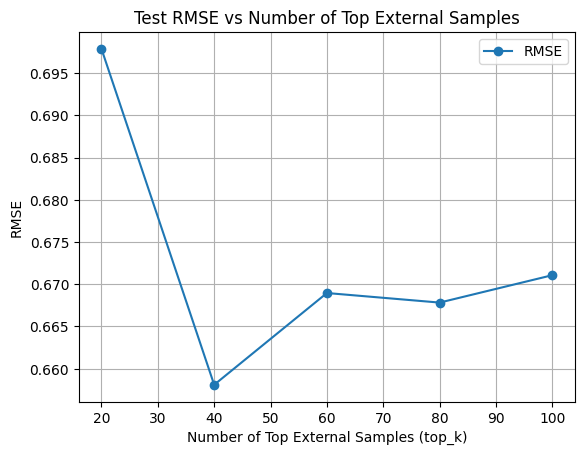

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import wandb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def initialize_model_and_optimizer():
    base_model = AutoModelForMaskedLM.from_pretrained(MODEL_NAME, trust_remote_code=True).to(device)
    regression_model = MoLFormerWithRegressionHead(base_model, hidden_dim=2362).to(device)

    optimizer = torch.optim.AdamW(regression_model.parameters(), lr=2e-5)

    return regression_model, optimizer

# Hyperparameters
finetune_epochs = 10
learning_rate = 2e-5

top_k_values = [100, 80, 60, 40, 20]  # Step sizes of 20
test_metrics = []

wandb.init(project="NNTI_Project_v2", name="Regression_FT_with_Selected_Data", reinit=True)

for top_k in top_k_values:
    print(f"Starting training with top {top_k} external samples...")

    regression_model, finetune_optimizer = initialize_model_and_optimizer()

    influence_scores_np = np.array(influence_scores)
    topk_indices = np.argsort(influence_scores_np)[-top_k:]

    selected_external_data = []
    for idx in topk_indices:
        selected_external_data.append(external_dataset[idx])

    combined_train_data = train_dataset.get_data() + selected_external_data
    combined_train_loader = DataLoader(combined_train_data, batch_size=16, shuffle=True)

    for epoch in range(finetune_epochs):
        regression_model.train()
        total_loss = 0

        for batch in tqdm(combined_train_loader, desc=f"Fine-tuning epoch {epoch+1} (top {top_k} samples)"):
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            targets = batch["target"].to(device).unsqueeze(1)

            finetune_optimizer.zero_grad()

            outputs = regression_model(input_ids, attention_mask)

            loss = nn.MSELoss()(outputs, targets)

            loss.backward()

            finetune_optimizer.step()

            total_loss += loss.item()

        print(f"Finetune Epoch {epoch+1}: Loss = {total_loss/len(combined_train_loader)}")
        wandb.log({"finetune_epoch_loss": total_loss/len(combined_train_loader)})

    regression_model.eval()
    predictions = []
    actuals = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            targets = batch["target"].to(device)

            outputs = regression_model(input_ids, attention_mask).squeeze(1)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(targets.cpu().numpy())

    mse = mean_squared_error(actuals, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)

    print(f"Test Metrics for top {top_k}:")
    print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R²: {r2}")

    wandb.log({"test_mse": mse, "test_rmse": rmse, "test_mae": mae, "test_r2": r2})

    test_metrics.append({"top_k": top_k, "mse": mse, "rmse": rmse, "mae": mae, "r2": r2})

top_k_values = [metric["top_k"] for metric in test_metrics]
rmse_values = [metric["rmse"] for metric in test_metrics]

plt.plot(top_k_values, rmse_values, marker="o", label="RMSE")
plt.xlabel("Number of Top External Samples (top_k)")
plt.ylabel("RMSE")
plt.title("Test RMSE vs Number of Top External Samples")
plt.grid(True)
plt.legend()
plt.show()
